# Transactions Product Demographic Analysis of a Random Comapny

We'll be working with the transactions, product, and hh_demographic tables for a random company.

* First, read in the transactions data.

* Read in the only columns `household_key`, `BASKET_ID`, `DAY`, `PRODUCT_ID`, `QUANTITY`, and `SALES_VALUE`.

* Convert `DAY`, `QUANTITY`, and `PRODUCT_ID` to the smallest appropriate integer types.


In [1]:
import pandas as pd
import numpy as np

In [2]:
transactions = pd.read_csv("../project_data/project_transactions.csv", 
                           usecols=["household_key", "BASKET_ID", "DAY", "PRODUCT_ID", "QUANTITY", "SALES_VALUE"])

In [3]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   household_key  int64  
 1   BASKET_ID      int64  
 2   DAY            int64  
 3   PRODUCT_ID     int64  
 4   QUANTITY       int64  
 5   SALES_VALUE    float64
dtypes: float64(1), int64(5)
memory usage: 98.3 MB


In [4]:
transactions = transactions.astype({"DAY":"int32", "QUANTITY":"int16", "PRODUCT_ID":"int32"})

In [5]:
# Use the following snippet to create a Date Column.

transactions = (
    transactions
    .assign(date = (pd.to_datetime("2016", format='%Y') 
                    + pd.to_timedelta(transactions["DAY"].sub(1).astype(str) + " days"))
           )
    .drop(["DAY"], axis=1)
)

In [6]:
transactions.head()

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,date
0,1364,26984896261,842930,1,2.19,2016-01-01
1,1364,26984896261,897044,1,2.99,2016-01-01
2,1364,26984896261,920955,1,3.09,2016-01-01
3,1364,26984896261,937406,1,2.50,2016-01-01
4,1364,26984896261,981760,1,0.60,2016-01-01


## TIME BASED ANALYSIS

* Plot the sum of sales by month. Are sales growing over time?
* Next, plot the same series after filtering down to dates April 2016 and October 2017.
* Then, plot the sum of monthly sales in 2016 vs the monthly sales 2017.
* Finally, plot total sales by day of week.

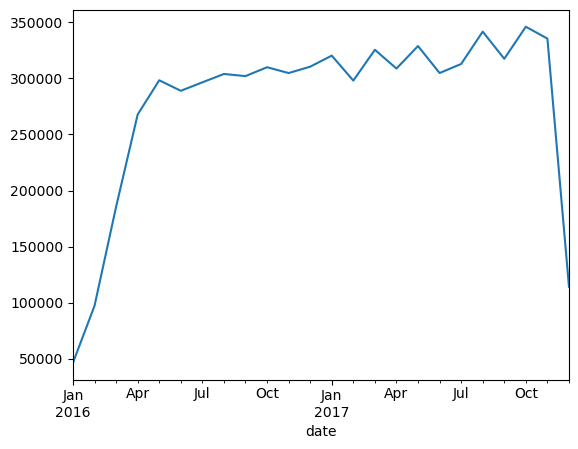

In [7]:
# Set a date index, graby the sales column, and calculate a monthly sum using resampling.
# Then build the default line plot
transactions.set_index('date').resample('M')["SALES_VALUE"].sum().plot();

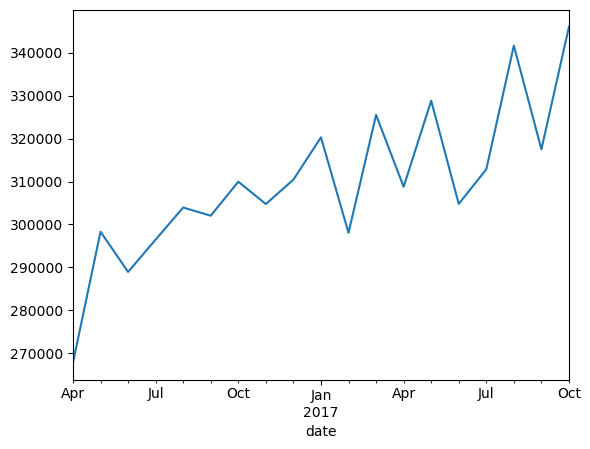

In [8]:
# Filter above plot to specified date range with row slice in .loc
transactions.set_index('date').loc['2016-04':'2017-10'].resample('M')["SALES_VALUE"].sum().plot();

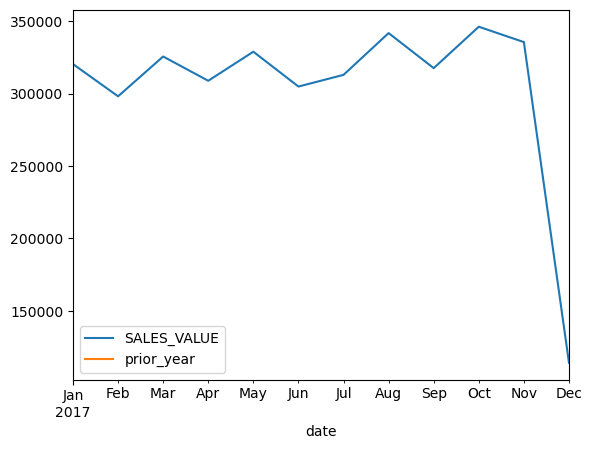

In [9]:
# After resampling monthly sales, create a year_prior column with assign
# This column is our monthly sales shifted forward a year (12 rows/months)
transactions.set_index('date').resample("M")[['SALES_VALUE']].sum().assign(prior_year = lambda x: x[transactions].shift(12)).loc["2017"].plot();

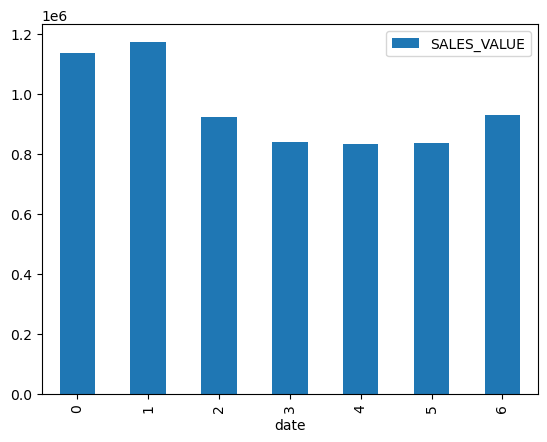

In [10]:
# Group transactions by dayofweek, then calculate sum and plot a bar chart
transactions.groupby(transactions['date'].dt.dayofweek).agg({"SALES_VALUE":"sum"}).plot.bar();

# DEMOGRAPHICS

* Read in the `hh_demographic.csv` file, but only the columns `AGE_DESC`, `INCOME_DESC`, `household_key`, and `HH_COMP_DESC`. Convert the appropriate columns to the category dtype.


* Then group the transactions table by household_id, and calculate the sum of SALES VALUE by household.


* Once you've done that, join the demographics DataFrame to the aggregated transactions table. Since we're interested in analyzing the demographic data we have, make sure not to include rows from transactions that don't match.


* Plot the sum of sales by age_desc and income_desc (in separate charts).


* Then, create a pivot table of the mean household sales by `AGE_DESC` and `HH_COMP_DESC`. Which of our demographics have the highest average sales?


In [11]:
# Specify columns to include 
# Convert the object columns here to category dtype
demographics = pd.read_csv("../project_data/hh_demographic.csv", 
                           usecols=["AGE_DESC", "INCOME_DESC", "household_key", "HH_COMP_DESC"],
                          dtype={"AGE_DESC":"category", "INCOME_DESC":"category", "HH_COMP_DESC":"category"})

In [12]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   AGE_DESC       801 non-null    category
 1   INCOME_DESC    801 non-null    category
 2   HH_COMP_DESC   801 non-null    category
 3   household_key  801 non-null    int64   
dtypes: category(3), int64(1)
memory usage: 9.5 KB


In [14]:
demographics = demographics.astype({"household_key":"int16"})

In [15]:
demographics.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   AGE_DESC       801 non-null    category
 1   INCOME_DESC    801 non-null    category
 2   HH_COMP_DESC   801 non-null    category
 3   household_key  801 non-null    int16   
dtypes: category(3), int16(1)
memory usage: 6.2 KB


In [102]:
demographics.head()

,AGE_DESC,INCOME_DESC,HH_COMP_DESC,household_key
0,65+,35-49K,2 Adults No Kids,1
1,45-54,50-74K,2 Adults No Kids,7
2,25-34,25-34K,2 Adults Kids,8
3,25-34,75-99K,2 Adults Kids,13
4,45-54,50-74K,Single Female,16


In [100]:
transactions.head()

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,date
0,1364,26984896261,842930,1,2.19,2016-01-01
1,1364,26984896261,897044,1,2.99,2016-01-01
2,1364,26984896261,920955,1,3.09,2016-01-01
3,1364,26984896261,937406,1,2.50,2016-01-01
4,1364,26984896261,981760,1,0.60,2016-01-01


In [16]:
# Create total sales by household dataframe
household_sales = transactions.groupby("household_key")[['SALES_VALUE']].sum()
household_sales

,SALES_VALUE
household_key,
1,4330.16
2,1954.34
3,2653.21
4,1200.11
5,779.06
...,...
2095,3790.49
2096,1301.65
2097,8823.83


In [17]:
# Join household sales and demographics table on household_key 
demographics = demographics.merge(household_sales, how="inner", on="household_key")

In [164]:
demographics.head()

,AGE_DESC,INCOME_DESC,HH_COMP_DESC,household_key,SALES_VALUE
0,65+,35-49K,2 Adults No Kids,1,4330.16
1,45-54,50-74K,2 Adults No Kids,7,3400.05
2,25-34,25-34K,2 Adults Kids,8,5534.97
3,25-34,75-99K,2 Adults Kids,13,13190.92
4,45-54,50-74K,Single Female,16,1512.02


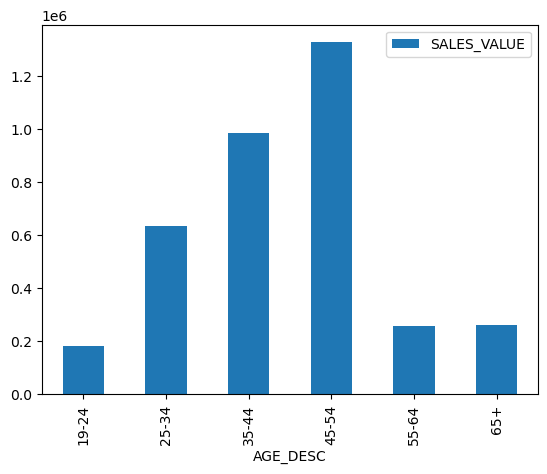

In [165]:
# Calculate sum of sales by age group and plot
demographics.groupby('AGE_DESC')[['SALES_VALUE']].sum().plot.bar();

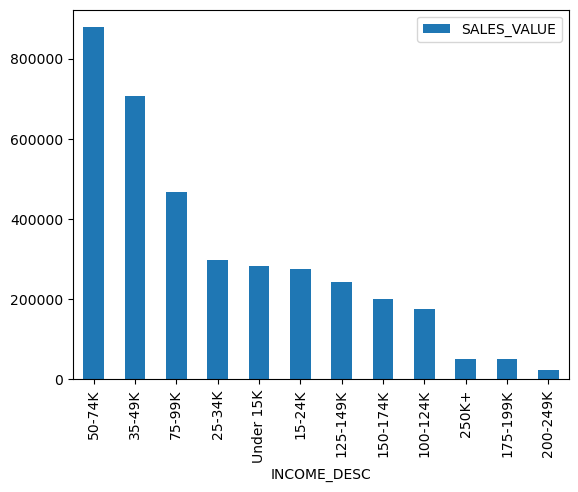

In [168]:
# Calculate sum of sales by income, ordered by magnitude and plot 
demographics.groupby('INCOME_DESC')[['SALES_VALUE']].sum().sort_values('SALES_VALUE', ascending = False).plot.bar();

In [18]:
# Calculate mean household spend by Age Description and HH Composition
demographics.pivot_table(index="AGE_DESC", columns="HH_COMP_DESC", values="SALES_VALUE", aggfunc="mean", margins=True)

HH_COMP_DESC,1 Adult Kids,2 Adults Kids,2 Adults No Kids,Single Female,Single Male,Unknown,All
AGE_DESC,,,,,,,
19-24,7268.796667,5428.945000,4020.800000,4576.095556,3216.835000,4911.275000,4692.077692
25-34,5512.196875,5753.973514,5638.515833,4807.440588,4909.522381,7356.270000,5435.517521
35-44,6297.737778,6691.772264,6260.412444,6015.192069,4844.192000,4227.691818,6090.556728
45-54,6632.569167,6610.484490,5839.527027,4549.365405,4636.637083,4843.995682,5534.879958
55-64,3064.870000,4695.655000,5752.413684,4816.148462,3922.546250,7973.750000,5168.924200
65+,4040.810000,5536.866667,4614.108571,4059.699412,3871.556000,2879.290000,4340.936500
All,6032.802143,6280.069103,5599.857756,4895.928361,4544.646750,4936.127778,5468.398743


# PRODUCT DEMOGRAPHICS

* Read in the product csv file.

* Only read in product_id and department from product (consider converting columns).

* Join the product DataFrame to transactions and demographics tables, performing an inner join when joining both tables.

* Finally, pivot the fully joined dataframe by AGE_DESC and DEPARTMENT, calculating the sum of sales. Which category does our youngest demographic perform well in?



In [20]:
# specify columns to use
product = pd.read_csv("../project_data/product.csv", usecols=["PRODUCT_ID", "DEPARTMENT"])
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PRODUCT_ID  92353 non-null  int64 
 1   DEPARTMENT  92353 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [21]:
# specify datatypes for each column
product = product.astype({"PRODUCT_ID":"int32", "DEPARTMENT":"category"})
product.head()

,PRODUCT_ID,DEPARTMENT
0,25671,GROCERY
1,26081,MISC. TRANS.
2,26093,PASTRY
3,26190,GROCERY
4,26355,GROCERY


In [175]:
demographics.head()

,AGE_DESC,INCOME_DESC,HH_COMP_DESC,household_key,SALES_VALUE
0,65+,35-49K,2 Adults No Kids,1,4330.16
1,45-54,50-74K,2 Adults No Kids,7,3400.05
2,25-34,25-34K,2 Adults Kids,8,5534.97
3,25-34,75-99K,2 Adults Kids,13,13190.92
4,45-54,50-74K,Single Female,16,1512.02


In [178]:
transactions.head()

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,date
0,1364,26984896261,842930,1,2.19,2016-01-01
1,1364,26984896261,897044,1,2.99,2016-01-01
2,1364,26984896261,920955,1,3.09,2016-01-01
3,1364,26984896261,937406,1,2.50,2016-01-01
4,1364,26984896261,981760,1,0.60,2016-01-01


In [132]:
product.head()

,PRODUCT_ID,DEPARTMENT,AGE_DESC,INCOME_DESC,HH_COMP_DESC,household_key,BASKET_ID,QUANTITY,SALES_VALUE,date
0,25671,GROCERY,35-44,75-99K,2 Adults Kids,325,33046710871,4,13.96,2017-02-13
1,25671,GROCERY,35-44,50-74K,2 Adults No Kids,358,30707611686,1,3.49,2016-09-03
2,25671,GROCERY,45-54,100-124K,Single Female,1228,29046618323,1,3.49,2016-06-05
3,26601,DRUG GM,45-54,75-99K,Single Male,997,29224467440,1,7.59,2016-06-16
4,26636,PASTRY,35-44,Under 15K,Single Female,212,35469987050,1,2.50,2017-06-05


In [22]:
# Join all three tables together with an inner join
# Join product on product_id 
demo = (transactions.merge(demographics, 'inner', 'household_key').
        merge(product, 'inner', 'PRODUCT_ID')
       )

In [181]:
demo.head()

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE_x,date,AGE_DESC,INCOME_DESC,HH_COMP_DESC,SALES_VALUE_y,DEPARTMENT
0,1364,26984896261,842930,1,2.19,2016-01-01,65+,100-124K,Single Female,2466.05,GROCERY
1,304,27950201718,842930,1,1.67,2016-03-21,25-34,50-74K,2 Adults No Kids,8586.28,GROCERY
2,575,34186568032,842930,1,1.67,2017-04-29,35-44,50-74K,Single Female,11771.13,GROCERY
3,77,28023861855,842930,3,5.00,2016-03-27,35-44,100-124K,2 Adults Kids,6227.10,GROCERY
4,454,42136182098,842930,1,1.67,2017-11-29,55-64,35-49K,Single Male,8215.93,GROCERY


In [27]:
# Where does our youngest demographic rank near the top in sales?
pivot = demo.pivot_table(index= "DEPARTMENT", columns="AGE_DESC", values="SALES_VALUE_y", aggfunc="sum")

In [28]:
pivot

AGE_DESC,19-24,25-34,35-44,45-54,55-64,65+
DEPARTMENT,,,,,,
,6.393368e+05,5.349177e+06,8.960403e+06,1.371634e+07,2.430391e+06,1.909401e+06
AUTOMOTIVE,1.829041e+04,3.890681e+04,4.511701e+04,7.784170e+04,0.000000e+00,1.332665e+04
CHARITABLE CONT,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
CHEF SHOPPE,2.168784e+05,4.485661e+05,1.084316e+06,1.388529e+06,2.023170e+05,4.048232e+05
CNTRL/STORE SUP,6.961150e+03,1.485521e+04,2.078212e+04,2.397919e+04,1.106986e+04,5.139630e+03
COSMETICS,1.040129e+06,3.814477e+06,1.026723e+07,1.006667e+07,1.548055e+06,9.160178e+05
COUP/STR & MFG,8.211151e+04,3.154468e+05,6.329195e+05,8.901708e+05,1.590716e+05,1.484686e+05
DAIRY DELI,1.363660e+04,2.997827e+04,2.198168e+04,6.863277e+04,1.510370e+04,1.349503e+04
DELI,5.692354e+06,2.988664e+07,7.627509e+07,8.526932e+07,1.609178e+07,1.679169e+07


# EXPORT

Finally, export your pivot table to an excel file. Make sure to provide a sheet name.

In [29]:
pivot.to_excel("pivot.xlsx", sheet_name="sheet1")